In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat import rw
from statsrat.expr.predef.cat import fast
import read_fast_surveys as rfs
from pseudo_guid_list import pguid

            min   max  default
eta0        0.0  10.0      1.0
lrate       0.0   1.0      0.2
lrate_atn   0.0   2.0      0.2
metric      0.1  10.0      2.0
resp_scale  0.0  10.0      1.0
angry


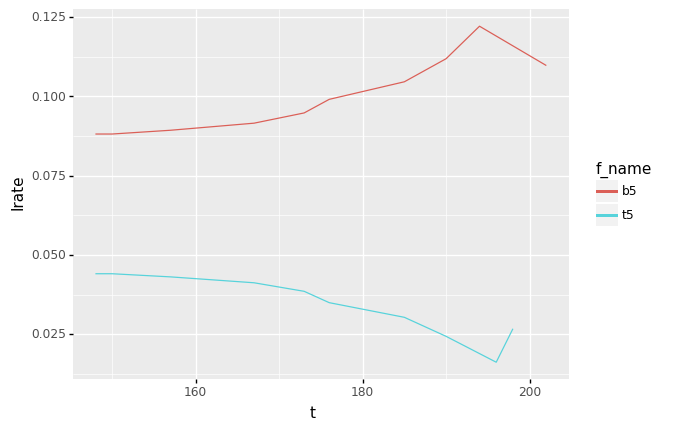

<ggplot: (307917933)>

In [2]:
# Indicate whether data import should be tested for debugging purposes.
test_import = True

# Indicate whether the learning model should be fit.
fit_model = False

# Define learning model.
model = rw.model(name = 'CompAct_eta0',
                        fbase = rw.fbase.elem,
                        fweight = rw.fweight.from_aux_norm,
                        lrate = rw.lrate.from_aux_norm,
                        aux = rw.aux.gradcomp_eta0)

trials = fast.make_trials()
print(model.pars)
foo = model.simulate(trials, par_val = [0.5, 0.2, 0.9, 0.8, 1])
x_dims = trials.attrs['x_dims']
bar = list(x_dims.keys())
bar.sort()
print(bar[0])

# Define time limit for model fitting (in old R code was Inf, but is 10 by default in current code).
max_time = 120

sr.learn_plot(foo, var = 'lrate', sel = {'f_name': ['t5', 'b5'], 'u_name': 'cat1'}, drop_zeros = True)

In [3]:
# Test import of in lab data
if test_import:
    path = 'debug_data_inlab'
    (ds_fall2020_inlab, summary_fall2020_inlab) = fast.read_csv(path = path,
                                                                x_col = ['cue1', 'cue2'],
                                                                resp_col = ['trial_resp.keys', 'test_resp.keys'],
                                                                resp_map = {'h' : 'cati', 'g' : 'catii', 'c' : 'cat1', 'm' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                ident_col = 'participant',
                                                                conf_col = 'conf_rating.response',
                                                                other_info = {'age': ('questionText', 'What is your age?', 'slider.response'),
                                                                              'sex': ('questionText', 'What was your biological sex assigned at birth?', 'slider.response'),
                                                                              'latinx': ('questionText', 'Do you consider yourself to be of Hispanic, Latino, or Spanish origin?', 'slider.response'),
                                                                              'race': ('questionText', 'With which racial group do you most closely identify?', 'slider.response'),
                                                                              'employment': ('questionText', 'What is your current employment status?', 'slider.response')},
                                                               n_final = 8)
    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_psychopy,
                           ident_col = 'participant')

    # Only keep people whose surveys can be read.
    index = summary_fall2020_inlab.index.isin(foo.index.values)
    ds_fall2020_inlab = ds_fall2020_inlab[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = model,
                          ds = ds_fall2020_inlab,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo], axis = 1)
    print(summary_fall2020_inlab)

{'tutorial_0a_last8_pct_correct': [100.0, 100.0, 100.0, 100.0, 100.0], 'tutorial_0b_last8_pct_correct': [100.0, 100.0, 100.0, 100.0, 87.5], 'tutorial_0c_last8_pct_correct': [100.0, 100.0, 100.0, 100.0, 87.5], 'training_last8_pct_correct': [100.0, 87.5, 100.0, 100.0, 87.5], 'transfer_last8_pct_correct': [87.5, 100.0, 100.0, 87.5, 87.5]}
             schedule    age     sex latinx    race           employment  \
ident                                                                      
NDARZC072PAH   design  18-24    Male     No   White    Full-time Student   
NDARMH389NCL   design  18-24  Female     No   White    Full-time Student   
NDARDJ786YFD   design  18-24    Male     No   White   Employed part-time   
NDARVN179CFY   design  18-24  Female     No   White   Employed part-time   
NDARPG437CRZ   design  18-24  Female     No   White    Full-time Student   

              tutorial_0a_last8_pct_correct  tutorial_0b_last8_pct_correct  \
ident                                              

In [4]:
# Test import of online data
if test_import:
    path = 'debug_data_online'
    (ds_fall2020_online, summary_fall2020_online) = fast.read_csv(path = path,
                                                                  x_col = ['abstract_stim1', 'abstract_stim2'],
                                                                  resp_col = ['response'],
                                                                  resp_map = {'h' : 'cati', 'g' : 'catii', 'l' : 'cat1', 'o' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                  ident_col = None,
                                                                  other_info = {'age': ('head', 'What is your age?', 'response'),
                                                                                'sex': ('head', 'What was your biological sex assigned at birth?', 'response'),
                                                                                'latinx': ('head', 'Do you consider yourself to be Hispanic, Latino, or of Spanish origin?', 'response'),
                                                                                'race': ('head', 'With which racial group do you identify (select the one with which you MOST CLOSELY identify)?', 'response'),
                                                                                'employment': ('head', 'What is your current employment status?', 'response')},
                                                                  header = 2,
                                                                  n_final = 8)
    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_testable,
                           ident_col = None,
                           header = 2)

    # Only keep people whose surveys can be read.
    index = summary_fall2020_online.index.isin(foo.index.values)
    ds_fall2020_online = ds_fall2020_online[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = model,
                          ds = ds_fall2020_online,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo], axis = 1)
    print(summary_fall2020_online)

{'tutorial_0a_last8_pct_correct': [100.0, 100.0, 100.0, 100.0, 100.0], 'tutorial_0b_last8_pct_correct': [100.0, 87.5, 100.0, 100.0, 100.0], 'tutorial_0c_last8_pct_correct': [100.0, 100.0, 100.0, 100.0, 100.0], 'training_last8_pct_correct': [100.0, 62.5, 62.5, 62.5, 100.0], 'transfer_last8_pct_correct': [100.0, 50.0, 75.0, 62.5, 100.0]}
                     schedule           age     sex latinx  \
ident                                                        
666579_201124_003135   design  20 years old  Female     No   
666579_201124_191514   design  18 years old    Male     No   
666579_201124_202717   design  18 years old  Female     No   
666579_201124_025712   design  19 years old  Female     No   
666579_201124_051236   design  19 years old  Female    Yes   

                                    race          employment  \
ident                                                          
666579_201124_003135  More than one race   Full-time student   
666579_201124_191514               

b'Skipping line 4: expected 9 fields, saw 36\nSkipping line 5: expected 9 fields, saw 36\nSkipping line 6: expected 9 fields, saw 36\nSkipping line 7: expected 9 fields, saw 36\nSkipping line 8: expected 9 fields, saw 36\nSkipping line 9: expected 9 fields, saw 36\nSkipping line 10: expected 9 fields, saw 36\nSkipping line 11: expected 9 fields, saw 36\nSkipping line 12: expected 9 fields, saw 36\nSkipping line 13: expected 9 fields, saw 36\nSkipping line 14: expected 9 fields, saw 36\nSkipping line 15: expected 9 fields, saw 36\nSkipping line 16: expected 9 fields, saw 36\nSkipping line 17: expected 9 fields, saw 36\nSkipping line 18: expected 9 fields, saw 36\nSkipping line 19: expected 9 fields, saw 36\nSkipping line 20: expected 9 fields, saw 36\nSkipping line 21: expected 9 fields, saw 36\nSkipping line 22: expected 9 fields, saw 36\nSkipping line 23: expected 9 fields, saw 36\nSkipping line 24: expected 9 fields, saw 36\nSkipping line 25: expected 9 fields, saw 36\nSkipping line 

In [5]:
# Import data collected in the lab (using Psychopy).

if not test_import:
    path = 'fast_data_inlab'

    # Import trial by trial task data.
    (ds_fall2020_inlab, summary_fall2020_inlab) = fast.read_csv(path = path,
                                                                x_col = ['cue1', 'cue2'],
                                                                resp_col = ['trial_resp.keys', 'test_resp.keys'],
                                                                resp_map = {'h' : 'cati', 'g' : 'catii', 'c' : 'cat1', 'm' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                ident_col = 'participant',
                                                                #conf_col = 'conf_rating.response', # INCLUDE CONFIDENCE RATINGS IN OAT SCORES.
                                                                other_info = {'age': ('questionText', 'What is your age?', 'slider.response'),
                                                                              'sex': ('questionText', 'What was your biological sex assigned at birth?', 'slider.response'),
                                                                              'latinx': ('questionText', 'Do you consider yourself to be of Hispanic, Latino, or Spanish origin?', 'slider.response'),
                                                                              'race': ('questionText', 'With which racial group do you most closely identify?', 'slider.response'),
                                                                              'employment': ('questionText', 'What is your current employment status?', 'slider.response')},
                                                               n_final = 8)

    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_psychopy,
                           ident_col = 'participant')

    # Only keep people whose surveys can be read.
    index = summary_fall2020_inlab.index.isin(foo.index.values)
    ds_fall2020_inlab = ds_fall2020_inlab[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = model,
                          ds = ds_fall2020_inlab,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_inlab = pd.concat([summary_fall2020_inlab.loc[index], foo], axis = 1)
    print(summary_fall2020_inlab)

In [6]:
# Import online data (collected using Testable).

# IMPORTANT NOTE: Many data files have missing confidence ratings, but are otherwise readable.
# THERE MUST BE SOME FLAW IN THE CURRENT TESTABLE CODE.

# DOES NOT INCLUDE CONFIDENCE RATINGS IN OAT SCORES.

if not test_import:
    path = 'fast_data_online'
    # Import trial by trial task data.
    (ds_fall2020_online, summary_fall2020_online) = fast.read_csv(path = path,
                                                                  x_col = ['abstract_stim1', 'abstract_stim2'],
                                                                  resp_col = ['response'],
                                                                  resp_map = {'h' : 'cati', 'g' : 'catii', 'l' : 'cat1', 'o' : 'cat2', 's' : 'cat3', 'r' : 'cat4'},
                                                                  ident_col = None,
                                                                  other_info = {'age': ('head', 'What is your age?', 'response'),
                                                                                'sex': ('head', 'What was your biological sex assigned at birth?', 'response'),
                                                                                'latinx': ('head', 'Do you consider yourself to be Hispanic, Latino, or of Spanish origin?', 'response'),
                                                                                'race': ('head', 'With which racial group do you identify (select the one with which you MOST CLOSELY identify)?', 'response'),
                                                                                'employment': ('head', 'What is your current employment status?', 'response')},
                                                                  header = 2,
                                                                  n_final = 8)
    # Import survey data.
    foo = rfs.read_surveys(path = path,
                           fun = rfs.process_testable,
                           ident_col = None,
                           header = 2)

    # Only keep people whose surveys can be read.
    index = summary_fall2020_online.index.isin(foo.index.values)
    ds_fall2020_online = ds_fall2020_online[{'ident': index}]

    if fit_model:
        # Fit model.
        bar = sr.fit_indv(model = model,
                          ds = ds_fall2020_online,
                          max_time = max_time)
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo, bar], axis = 1)
    else:
        # Concatenate data frames.
        summary_fall2020_online = pd.concat([summary_fall2020_online.loc[index], foo], axis = 1)
    print(summary_fall2020_online)

In [7]:
# ***** COMBINE DATA FRAMES AND FIX/ADD COLUMNS *****

# Combine online and in lab summary data.
foo = summary_fall2020_inlab
foo['source'] = 'inlab'
bar = summary_fall2020_online
bar['source'] = 'online'
summary_fall2020 = pd.concat([foo, bar], axis = 0)
summary_fall2020['avg_last8_pct_correct'] = (summary_fall2020['tutorial_0c_last8_pct_correct'] + summary_fall2020['training_last8_pct_correct'] + summary_fall2020['transfer_last8_pct_correct'])/3
summary_fall2020.reset_index(inplace = True, drop = False) # re-index

# Define GUID column, inserting pseudo-GUIDs as needed.
ident_val = summary_fall2020['ident'].values
guid = []
i = 0 # keep track of how many pseudo-GUIDs have been used so far
for ident in ident_val:
    # the true GUIDs should begin with 'NDAR' and be 12 characters long
    if (ident[0:4] == 'NDAR') and (len(ident) == 12):
        guid += [ident]
    else:
        guid += [pguid[i]]
        i += 1
summary_fall2020['guid'] = guid
summary_fall2020.loc[summary_fall2020['source'] == 'inlab', 'ident'] = summary_fall2020.loc[summary_fall2020['source'] == 'inlab', 'guid'].values # deal with those people who typed in an inappropriate ID

# Fix the 'sex' column.
summary_fall2020.loc[summary_fall2020['sex'] == ' Male', 'sex'] = 'Male'

# Fix the 'employment' column.
summary_fall2020.loc[summary_fall2020['employment'] == ' Employed part-time', 'employment'] = 'Employed part-time'
summary_fall2020.loc[summary_fall2020['employment'] == ' Full-time Student', 'employment'] = 'Full-time Student'
summary_fall2020.loc[summary_fall2020['employment'] == ' Seeking opportunities', 'employment'] = 'Seeking opportunities'
summary_fall2020['employment'] = summary_fall2020['employment'].str.lower()

# Fix the 'latinx' column.
summary_fall2020.loc[summary_fall2020['latinx'] == ' Yes', 'latinx'] = 'Yes'
summary_fall2020.loc[summary_fall2020['latinx'] == ' No', 'latinx'] = 'No'

# Add performance criterion.
# >= 75% on all stages (lumping all parts of stage 0 together as one stage) is the criterion for good performance that we used to analyze the Spring 2020 data. 
summary_fall2020['good_perf'] = (summary_fall2020['tutorial_0c_last8_pct_correct'] >= 75)&(summary_fall2020['training_last8_pct_correct'] >= 75)&(summary_fall2020['transfer_last8_pct_correct'] >= 75)

# Check that there are no duplicates.
n = summary_fall2020.shape[0]
n_unique = len(np.unique(summary_fall2020['ident']))
if n == n_unique:
    print('No duplicates detected.')
else:
    print(str(n - n_unique) + ' duplicates detected.')

print(summary_fall2020)

No duplicates detected.
                  ident schedule           age     sex latinx  \
0          NDARZC072PAH   design         18-24    Male     No   
1          NDARMH389NCL   design         18-24  Female     No   
2          NDARDJ786YFD   design         18-24    Male     No   
3          NDARVN179CFY   design         18-24  Female     No   
4          NDARPG437CRZ   design         18-24  Female     No   
5  666579_201124_003135   design  20 years old  Female     No   
6  666579_201124_191514   design  18 years old    Male     No   
7  666579_201124_202717   design  18 years old  Female     No   
8  666579_201124_025712   design  19 years old  Female     No   
9  666579_201124_051236   design  19 years old  Female    Yes   

                 race          employment  tutorial_0a_last8_pct_correct  \
0               White   full-time student                          100.0   
1               White   full-time student                          100.0   
2               White  employed 

In [8]:
if not test_import:
    # ***** EXPORT PROCESSED DATA *****
    
    #ds_fall2020.to_netcdf("ds_fall2020.nc") # I need to actually combine the datasets.
    summary_fall2020.to_csv('summary_fall2020.csv', index = False)
    
    # PREVIOUSLY THERE WERE 276 PEOPLE WHOSE DATA COULD BE READ.  WTF.
    # 107 IN LAB AND 170 ONLINE.
    # NOW THERE ARE 112 IN LAB AND 173 ONLINE.
    # The newly found in lab files are all from November 16th or 19th.
# I'm confident that I didn't add new data files.
# Also, the GUIDs for the in lab data are all unique, so there don't appear to be any duplicates.
# The only thing I can think of is that somehow my tinkering with the import code removed some flaw that
# previously was preventing a few perfectly good data files from being imported.
# UPDATE: I have found that, for whatever reason, not all of the data files were copied into the statsrat folders.
# I have since fixed this prob

In [9]:
print(summary_fall2020.loc[summary_fall2020['source'] == 'online', 'ident'].values)

['666579_201124_003135' '666579_201124_191514' '666579_201124_202717'
 '666579_201124_025712' '666579_201124_051236']
